## Multiple Linear Regression 

Model representation - a straight line: $f_{\vec{w},b}(\vec{x}) = \vec{w}.\vec{X}$ + $b$ ,   where $.$ is a dot product 
<br>
> Multiple Linear Regression is a model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line
<br>

* $w_{1} ... w_{n}, b = $ weights or coefficients or parameters of the model (adjusted as the model learns from data)
* $\vec{w} = [w_{1} ... w_{n}] = n$-length vector
* $b = $ scalar 
* $\vec{X} = $ feature matrix with $m$ rows and $n$ columns
* $n = $ length of sample vector
* $m = $ number of training samples
* $x^{(i)} = (x^{(i)}_{1}, ... , x^{(i)}_{n}) = $ feature vector $i$
* $x^{(i)}_{j} = $ element $j$ in sample $i$
* $f_{\vec{w},b}(x^{(i)}) = w_{1}x_{1}$ + ... + $w_{n}x_{1}$ + $b$
* $J(\vec{w},b) = J(w_{1}...w_{n},b) = \frac{1}{2m} \sum_{i=1}^{m} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} )^{2} = $ cost function, where $f_{\vec{w},b}(\vec{x}) = \vec{w}.x^{(i)}$ + $b$


## Gradient Descent with multiple variables

Repeat until convergence: {
    <br>  $w_{j} = w_{j} - \alpha \frac{\partial}{\partial w_{j}}J(\vec{w},b)$ 
    <br>  $b = b - \alpha \frac{\partial}{\partial b}J(\vec{w},b)$ <br> 
}
<br><br>
where: 
<br><br>$\frac{\partial}{\partial w_{j}}J(\vec{w},b) = \frac{1}{m} \sum_{i=1}^{m} \sum_{j=1}^{n} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} )x^{(i)}_{j}$ 
<br><br>$\frac{\partial}{\partial b}J(\vec{w},b) = \frac{1}{m} \sum_{i=1}^{m} ( f_{\vec{w},b}(x^{(i)}) - y^{(i)} )$

## Alternative to Gradient Descent:

<br>
 
> For models like Linear Regression, we can use two types of techniques to fit the parameter: Normal Equation and Gradient descent. 

* Normal equation is used only for linear regression i.e. does not generalize for other learning algorithms
* It's slow for number of features > 10000
* May be used on the background by ML libraries

## Multiple Linear Regresison - Example

Given a dataset containing area (sqm), number of bedrooms, number of floors, age and price of a set of houses, create a model for predicting house prices.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

data = pd.read_csv('data/1.3_homeprices.csv')
data.head()

,area,bedrooms,floors,age,price
0,2104,5,1,45,460
1,1416,3,2,40,232
2,852,2,1,35,178


In [130]:
# loc gets rows/columns with particular labels. iloc gets rows/columns at integer locations.
X_train = np.array(data.loc[:, ['area', 'bedrooms', 'floors', 'age']])  
y_train = np.array(data.loc[:,'price'])  

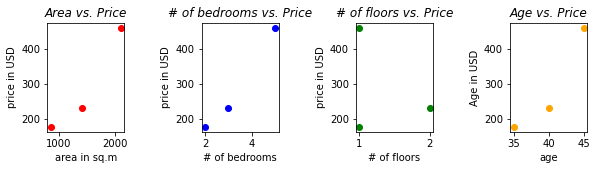

In [131]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15, 2))
ax0.scatter(X_train[:,0], y_train, marker='o', color='red')
ax0.set_title("Area vs. Price", fontstyle='italic') 
ax0.set_xlabel("area in sq.m")
ax0.set_ylabel("price in USD")
ax1.scatter(X_train[:,1], y_train, marker='o', color='blue')
ax1.set_title("# of bedrooms vs. Price", fontstyle='italic') 
ax1.set_xlabel("# of bedrooms")
ax1.set_ylabel("price in USD")
ax2.scatter(X_train[:,2], y_train, marker='o', color='green')
ax2.set_title("# of floors vs. Price", fontstyle='italic') 
ax2.set_xlabel("# of floors")
ax2.set_ylabel("price in USD")
ax3.scatter(X_train[:,3], y_train, marker='o', color='orange')
ax3.set_title("Age vs. Price", fontstyle='italic') 
ax3.set_xlabel("age")
ax3.set_ylabel("Age in USD") 
plt.subplots_adjust(left=0.5, right=1, wspace=1)
plt.show()

In [132]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # number of sample vectors
    cost = 0.0
    
    for i in range(m):
        cost = cost + (np.dot(X[i],w) + b - y[i])**2    
    cost = cost / (2*m)
    
    return cost

In [133]:
def compute_gradient(X, y, w, b):
    m, n = X.shape # number of samples, number of features
    dj_dw = np.zeros(n,) # the gradient of the cost with respect to w
    dj_db = 0. # the gradient of the cost with respect to b
    
    for i in range(m):
        diff = np.dot(X[i],w) + b - y[i]
    
        for j in range(n):
            dj_dw[j] = dj_dw[j] + diff * X[i,j]
    
        dj_db = dj_db + diff  
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_db, dj_dw

In [134]:
def gradient_descent(X, y, w_init, b_init, cost_func, gradient_func, alpha, num_iters): 
    w = copy.deepcopy(w_init)
    b = b_init
    
    for i in range (num_iters):
        dj_db, dj_dw = gradient_func(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % math.ceil (num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost_func(X, y, w, b):8.2f} ")
    
    return w, b
                

In [137]:
m, n = X_train.shape
w_init = np.zeros(n) 
b_init = 0.
iterations = 1000
alpha = 5.0e-7

w, b = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, iterations)

print(f"\nw, b found by fradient descent: {b_final:0.5f}, {w_final}")
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.5f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46 
Iteration  100: Cost   695.99 
Iteration  200: Cost   694.92 
Iteration  300: Cost   693.86 
Iteration  400: Cost   692.81 
Iteration  500: Cost   691.77 
Iteration  600: Cost   690.73 
Iteration  700: Cost   689.71 
Iteration  800: Cost   688.70 
Iteration  900: Cost   687.69 

w, b found by fradient descent: -0.00224, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
prediction: 426.18530, target value: 460
prediction: 286.16747, target value: 232
prediction: 171.46763, target value: 178
